In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    learning_curve,
    train_test_split,
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [69]:
breast_cancer_df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
    header=None,
)


In [70]:
breast_cancer_df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [71]:
breast_cancer_df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype='int64')

In [72]:
X_breast_cancer = breast_cancer_df.loc[:,2:].values
y_breast_cancer = breast_cancer_df.loc[:,1].values

In [73]:
le = LabelEncoder()
y_breast_cancer = le.fit_transform(y_breast_cancer)

In [74]:
X_train_breast_cancer, X_test_breast_cancer, y_train_breast_cancer, y_test_breast_cancer = train_test_split(X_breast_cancer, y_breast_cancer, test_size=0.2, stratify=y_breast_cancer)

In [75]:
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=12),
                        LogisticRegression())

In [76]:
pipe_lr.fit(X_train_breast_cancer, y_train_breast_cancer)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=12)),
                ('logisticregression', LogisticRegression())])

In [77]:
pipe_lr.score(X_test_breast_cancer,y_test_breast_cancer)

0.9824561403508771

In [78]:
performence_per_components = []

In [79]:
for i in range(1,15):
    pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=i),
                        LogisticRegression())
    pipe_lr.fit(X_train_breast_cancer,y_train_breast_cancer)
    performence_per_components.append(pipe_lr.score(X_test_breast_cancer,y_test_breast_cancer))    

In [80]:
performence_per_components_series = pd.Series(performence_per_components)
performence_per_components_series.index=[i for i in range(1,15)]

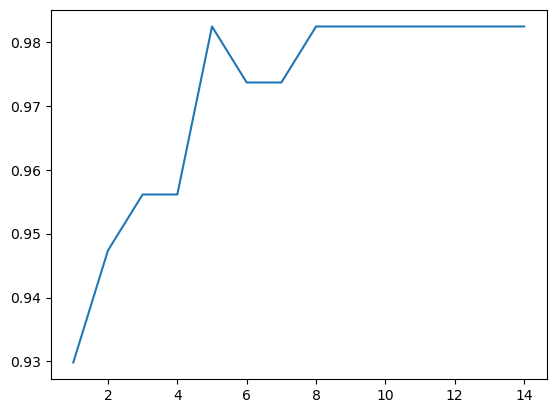

In [81]:
plt.plot(performence_per_components_series)

In [82]:
cross_validation_scores = cross_val_score(
    estimator=pipe_lr, X=X_train_breast_cancer, y=y_train_breast_cancer, cv=10, n_jobs=1
)
cross_validation_scores

array([1.        , 0.95652174, 0.95652174, 0.97826087, 1.        ,
       0.97777778, 0.95555556, 1.        , 0.97777778, 0.93333333])

In [83]:
cross_validation_scorestrain_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_lr,
    X=X_train_breast_cancer,
    y=y_train_breast_cancer,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=10,
    n_jobs=1,
)


In [84]:
train_sizes=np.linspace(0.1, 1.0, 10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

(0.8, 1.03)

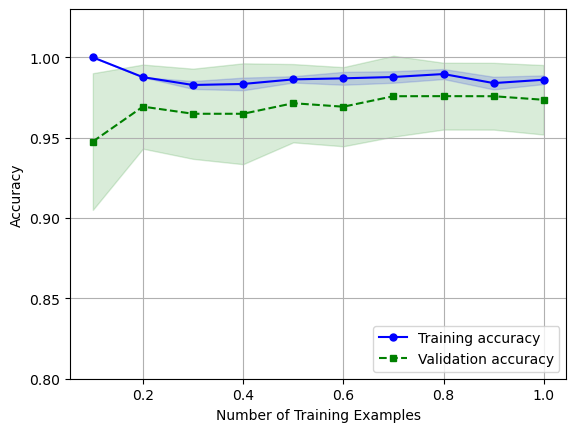

In [85]:

plt.plot(
    train_sizes,
    train_mean,
    color="blue",
    marker="o",
    markersize=5,
    label="Training accuracy",
)
plt.fill_between(
    train_sizes,
    train_mean + train_std,
    train_mean - train_std,
    alpha=0.15,
    color="blue",
)
plt.plot(
    train_sizes,
    test_mean,
    color="green",
    linestyle="--",
    marker="s",
    markersize=5,
    label="Validation accuracy",
)
plt.fill_between(
    train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color="green"
)
plt.grid()
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.ylim([0.8, 1.03])


In [86]:
param_grid = {
    "pca__n_components": [2, 5, 10],  # Example values for PCA components
    "logisticregression__C": [0.01, 0.1, 1, 10, 100],  # Regularization strength
    "logisticregression__solver": [
        "lbfgs",
        "liblinear",
    ],  # Solvers for Logistic Regression
}

In [87]:
grid_search = GridSearchCV(pipe_lr, param_grid, cv=5, scoring='accuracy')

In [88]:
grid_search.fit(X_train_breast_cancer, y_train_breast_cancer)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA(n_components=14)),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100],
                         'logisticregression__solver': ['lbfgs', 'liblinear'],
                         'pca__n_components': [2, 5, 10]},
             scoring='accuracy')

In [89]:
best_parameters = grid_search.best_params_

In [90]:
best_parameters

{'logisticregression__C': 0.1,
 'logisticregression__solver': 'liblinear',
 'pca__n_components': 10}

In [91]:
best_model = grid_search.best_estimator_

In [92]:
print(best_model)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=10)),
                ('logisticregression',
                 LogisticRegression(C=0.1, solver='liblinear'))])


In [93]:
cv_results = grid_search.cv_results_

In [94]:
results_df = pd.DataFrame(cv_results)

In [95]:
results_df.shape

(30, 16)

In [96]:
results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_logisticregression__C', 'param_logisticregression__solver',
       'param_pca__n_components', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [97]:
y_pred_best_model = best_model.predict(X_test_breast_cancer)

In [98]:
confusion_matrix(y_true=y_test_breast_cancer, y_pred=y_pred_best_model)

array([[71,  1],
       [ 1, 41]])

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_breast_cancer)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Map the target variable to categorical labels (Malignant, Benign)
y_breast_cancer_series = pd.Series(y_breast_cancer).map(
    {"M": "Malignant", "B": "Benign"}
)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(
    data=X_pca, columns=["Principal Component 1", "Principal Component 2"]
)
pca_df["Tumor Type"] = y_breast_cancer_series

# Plot the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="Principal Component 1",
    y="Principal Component 2",
    hue="Tumor Type",
    data=pca_df,
    palette=["red", "blue"],
)
plt.title("PCA of Breast Cancer Dataset (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Tumor Type")
plt.show()

In [107]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_breast_cancer, y_breast_cancer, test_size=0.3, random_state=42
)



In [108]:
# Initialize different classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
}


# Function to train and evaluate models
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        # Create a pipeline with standard scaler and the classifier
        pipeline = Pipeline([("scaler", StandardScaler()), ("classifier", model)])

        # Train the model
        pipeline.fit(X_train, y_train)

        # Make predictions
        y_pred = pipeline.predict(X_test)

        # Calculate accuracy and store the result
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
        print(f"----- {name} -----")
        print(f"Accuracy: {accuracy:.4f}")
        print(classification_report(y_test, y_pred))

    return results


# Evaluate the models
results = evaluate_models(models, X_train, X_test, y_train, y_test)


----- Logistic Regression -----
Accuracy: 0.9825
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

----- Random Forest -----
Accuracy: 0.9708
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

----- Support Vector Machine -----
Accuracy: 0.9766
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                          

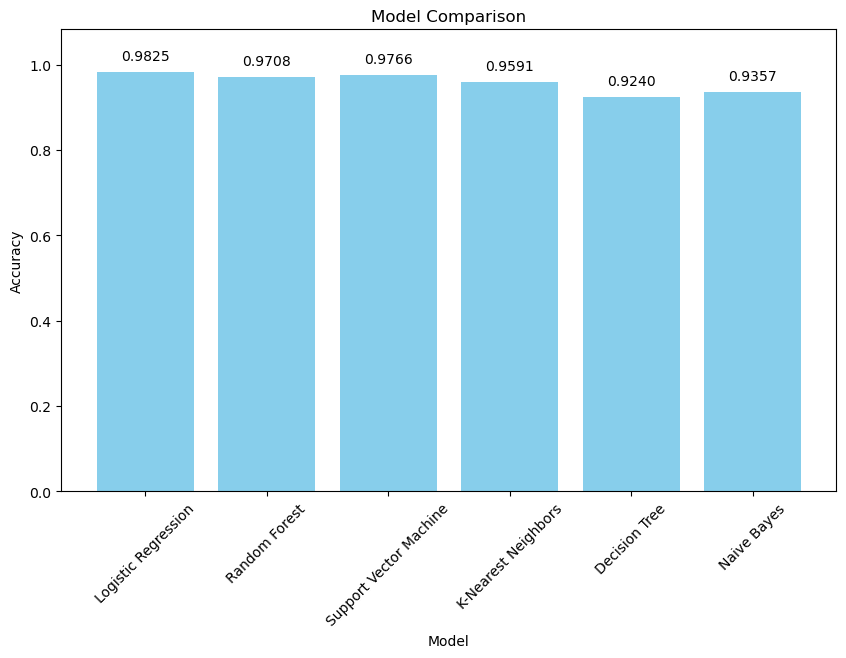

In [109]:
# Plot the comparison with accuracy values on top of the bars
plt.figure(figsize=(10, 6))
bars = plt.bar(results.keys(), results.values(), color="skyblue")

# Add accuracy values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0.02,
        f"{yval:.4f}",
        ha="center",
        va="bottom",
    )

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.xticks(rotation=45)

# Set y-limit with a small margin above the maximum value to ensure the text is not cut off
plt.ylim(0, max(results.values()) + 0.1)

plt.show()
